**AIVLE School 미니프로젝트**
### **통신 서비스 이용 고객의 <span style="color:darkgreen">이탈 여부</span> 예측 문제**
---

<br>

#### **<span style="color:red">[미션 안내]</span>**
* 고객 관련 데이터를 분석한 후 고객의 서비스 중단 또는 경쟁업체로의 이탈 여부를 예측하는 머신러닝, 딥러닝 모델을 만들고 결과를 예측하세요.

#### **<span style="color:red">[유의 사항]</span>**
* 각 문항의 답안코드는 반드시 '#여기에 답안코드를 작성하세요'로 표시된 cell에 작성해야 합니다.
* 제공된 cell을 추가/삭제하고 다른 cell에 답안코드를 작성 시 채점되지 않습니다.
* 반드시 문제에 제시된 가이드를 읽고 답안 작성하세요.
* 문제에 변수명이 제시된 경우 반드시 해당 변수명을 사용하세요.
* 문제와 데이터는 제3자에게 공유하거나 개인적인 용도로 사용하는 등 외부로 유출할 수 없으며 유출로 인한 책임은 응시자 본인에게 있습니다.

<br>

### 1. scikit-learn 패키지는 머신러닝 교육을 위한 최고의 파이썬 패키지입니다.
### scikit-learn를 별칭(alias) sk로 임포트하는 코드를 작성하고 실행하세요.

In [1]:
# 여기에 답안코드를 작성하세요.
import sklearn as sk

<br>

### 2. Pandas를 사용할 수 있도록 별칭(alias)을 pd로 해서 불러오세요.

In [2]:
# 여기에 답안코드를 작성하세요.
import pandas as pd

<br>

### 3. 모델링을 위해 분석 및 처리할 데이터 파일을 읽어오려고 합니다.
### Pandas함수로 데이터 파일을 읽어 데이터프레임 변수명 df에 할당하는 코드를 작성하세요.
* churn_data.csv 파일을 읽어 데이터 프레임 변수명 df에 할당하세요.

In [3]:
# 여기에 답안코드를 작성하세요.
df = pd.read_csv('churn_data.csv')

<br>

### 4. df에서 불필요한 customerID 컬럼을 삭제하고 df1에 저장하세요.

In [4]:
# 여기에 답안코드를 작성하세요.
df1 = df.drop(columns = 'customerID')

<br>

### 5. df1의 TotalCharges 컬럼의 타입을 float로 변경하세요.
* TotalCharge의 컬럼 타입을 확인하는 코드를 작성하세요.
* ' ' 값을 0으로 변환하고 컬럼 타입을 float로 변경하세요.
* 전처리 후 데이터를 df2에 저장하세요.

In [29]:
# 여기에 답안코드를 작성하세요.

df1['TotalCharges'].dtype # objects형 의미
df1.loc[df1['TotalCharges']==' ', 'TotalCharges'] = 0
df2 = df1.astype({'TotalCharges': 'float'})
# df2['TotalCharges'] = df2['TotalCharges'].astype(float)

<br>

### 6. df2에서 Churn 컬럼의 데이터별 개수를 확인하는 코드를 작성하고 
### Yes, No를 각각 1, 0으로 변환한 후 df3에 저장하세요.

In [31]:
# 여기에 답안코드를 작성하세요.

print(df2['Churn'].value_counts())
df3 = df2.copy()
df3['Churn'] = df2['Churn'].replace({'Yes':1 ,'No':0})
print(df3['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
0    5174
1    1869
Name: count, dtype: int64


<br>

### 7. df3의 모든 컬럼에 대해 결측치를 확인하는 코드를 작성하고 결측치를 처리하세요.
* 결측치가 40% 이상인 컬럼은 컬럼을 삭제하세요.
* 결측치가 40% 미만인 컬럼은 결측치가 있는 row를 삭제하세요.
* 전처리한 데이터를 df4에 저장하세요.

In [7]:
# 여기에 답안코드를 작성하세요.

df3.isnull().sum()/len(df3)
df4 = df3.drop(columns = 'DeviceProtection')
df4.dropna(how='any', inplace=True) # how의 default는 any

<br>

### 8. df4에서 SeniorCitizen 컬럼을 bar 차트로 확인해보고 불균형을 확인해보세요. 
### SeniorCitizen 컬럼은 불균형이 심하므로 삭제하세요.

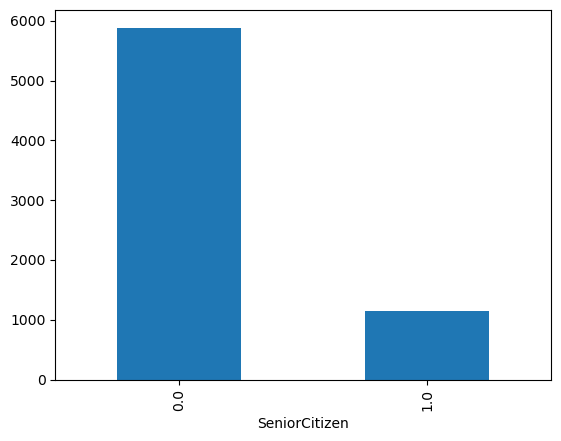

In [9]:
df4['SeniorCitizen'].value_counts().plot.bar()

df4.drop(columns = 'SeniorCitizen', inplace=True)

<br>

### 9. df4에서 다음의 가이드에 따라 데이터를 시각화 해보세요.
* tenure (서비스 사용기간)에 대해 히스토그램으로 시각화 하세요.
* tenure를 x 값으로 churn을 hue 값으로 사용하여 kdeplot으로 시각화 하고 '서비스 사용기간이 길어질 수록 이탈이 적다'에 대해 'O'인지 'X'인지 출력하세요.
* MultipleLines에 대해 countplot을 그리고 churn을 hue 값으로 사용하여 countplot으로 시각화 하고 'MultipleLines 서비스를 사용하는 고객이 약간 더 높은 이탈율을 보인다'에 대해 'O'인지 'X'인지 출력하세요.
* 'tenure','MonthlyCharges','TotalCharges' 컬럼간의 상관관계를 확인하여 heatmap으로 시각화하고 가장 높은 상관계수 값을 출력하세요.

O
O
0.83


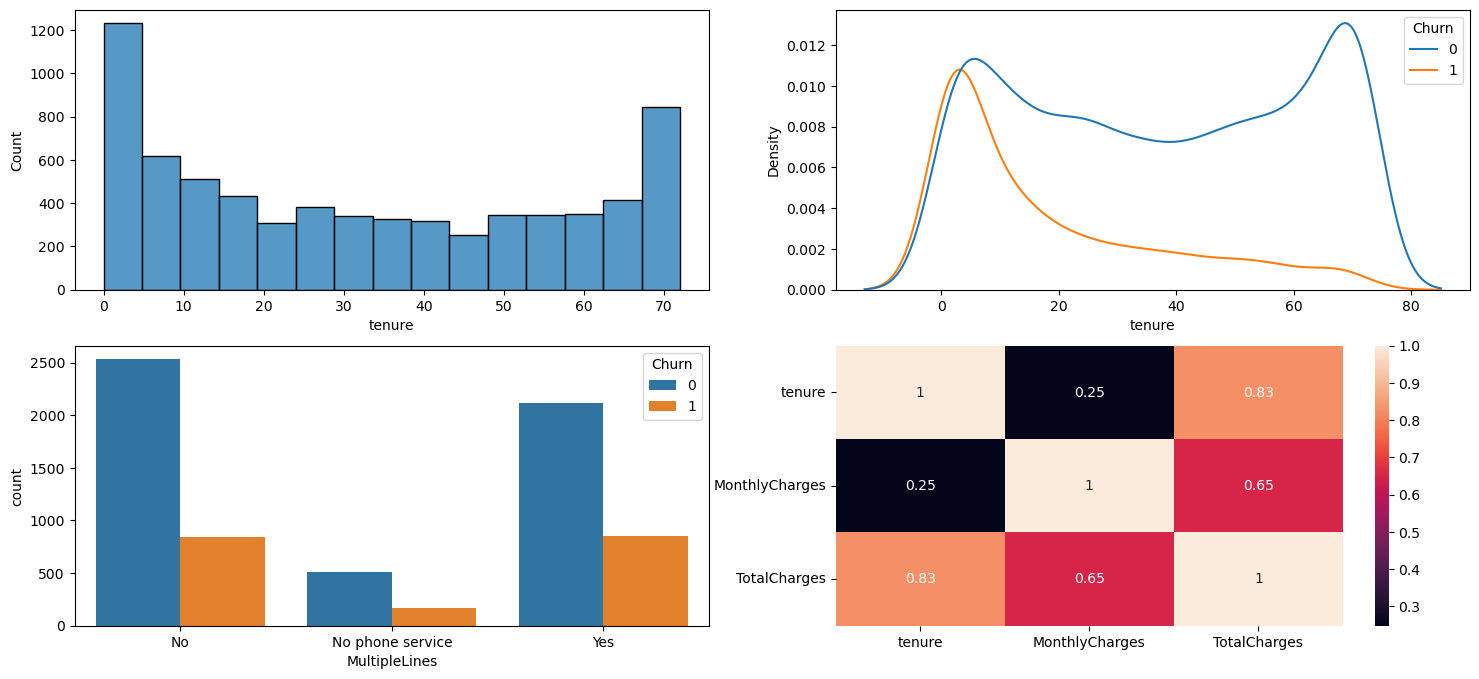

In [10]:
# 여기에 답안코드를 작성하세요.

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
plt.subplot(2, 2, 1)
sns.histplot(data = df4, x ='tenure')

plt.subplot(2, 2, 2)
sns.kdeplot(data = df4, x='tenure', hue='Churn')
print('O')

plt.subplot(2, 2, 3)
sns.countplot(data= df4, x='MultipleLines', hue='Churn')
print('O')

plt.subplot(2, 2, 4)
sns.heatmap(df4[['tenure','MonthlyCharges','TotalCharges']].corr(), annot=True)
print(0.83)

plt.show()

<br>

### 10. df4에서 컬럼의 데이터 타입이 object인 컬럼들을 원-핫 인코딩하세요.
* 컬럼의 데이터 타입이 object인 컬럼들을 object_cols 변수에 저장하세요.
* object_cols 변수의 컬럼들을 원-핫 인코딩하세요.
* 전처리된 데이터를 df5에 저장하세요.

In [11]:
# 여기에 답안코드를 작성하세요.

object_cols = df4.select_dtypes(include='object').columns

df5 = pd.get_dummies(df4, columns = object_cols)
df5

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1,34,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,False,True
2,2,53.85,108.15,1,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
3,45,42.30,1840.75,0,False,True,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,2,70.70,151.65,1,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
5,8,99.65,820.50,1,True,False,True,False,True,False,...,True,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,72,21.15,1419.40,0,True,False,True,False,True,False,...,False,False,False,True,False,True,True,False,False,False
7038,24,84.80,1990.50,0,False,True,False,True,False,True,...,True,False,True,False,False,True,False,False,False,True
7039,72,103.20,7362.90,0,True,False,False,True,False,True,...,True,False,True,False,False,True,False,True,False,False
7040,11,29.60,346.45,0,True,False,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


<br>

### 11. df5에 대해 Scikit-learn의 train_test_split 함수로 훈련, 검증 데이터를 분리하세요.
* 입력 : X, y (y에는 churn을 저장하고 X에는 churn을 제외한 나머지를 저장하세요)
* Train : Test 비율 = 8:2
* y Class 비율에 맞게 나누는 옵션을 추가하세요.
* random_state=42 로 설정하세요.
* 결과 : X_train, X_valid, y_train, y_valid에 저장하세요.

In [12]:
# 여기에 답안코드를 작성하세요.

from sklearn.model_selection import train_test_split
X = df5.drop(columns = 'Churn')
y = df5.loc[:, 'Churn']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.2, stratify = y, random_state=42)

<br>

### 12. MinMaxScaler 함수를 'scaler'로 정의하고 데이터를 정규화하세요.

In [13]:
# 여기에 답안코드를 작성하세요.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

<br>

### 13. 고객 이탈 여부를 예측하는 머신러닝 모델을 만들려고 합니다.
### 아래 가이드에 따라 모델링하고 학습을 진행하세요.
* LogisticRegression 모델 정의하고 학습시키세요. 
* KNN으로 모델을 정의하고 학습시키세요. (n_neighbors=5)
* Decision Tree로 모델을 정의하고 학습시키세요. (max_depth=10, random_state=42)
* RandomForest로 모델을 정의하고 학습시키세요. (n_estimators=3, random_state=42)
* XGBoost로 모델을 정의하고 학습시키세요. (n_estimators=3, random_state=42)  
* Light GBM으로 모델을 정의하고 학습시키세요. (n_estimators=3, random_state=42)  
* 각각 다른 셀에 답안코드를 작성하세요.

In [14]:
# 여기에 답안코드를 작성하세요.(LogisticRegression)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_valid, y_valid)

0.7930298719772404

In [15]:
# 여기에 답안코드를 작성하세요.(KNN)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_valid, y_valid)

0.7567567567567568

In [16]:
# 여기에 답안코드를 작성하세요.(Decision Tree)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 10, random_state = 42)
dt.fit(X_train, y_train)
dt.score(X_valid, y_valid)

0.7617354196301565

In [17]:
# 여기에 답안코드를 작성하세요.(RandomForest)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 3, random_state = 42)
rf.fit(X_train, y_train)
rf.score(X_valid, y_valid)

0.7467994310099573

In [18]:
# 여기에 답안코드를 작성하세요.(XgBoost)
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators = 3, random_state=42)
xgb.fit(X_train, y_train)
xgb.score(X_valid, y_valid)

0.7930298719772404

In [19]:
# 여기에 답안코드를 작성하세요.(lightgbm)
!pip install lightgbm

from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators = 3, random_state=42)
lgbm.fit(X_train, y_train)
lgbm.score(X_valid, y_valid)

[LightGBM] [Info] Number of positive: 1493, number of negative: 4128
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 5621, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265611 -> initscore=-1.017006
[LightGBM] [Info] Start training from score -1.017006


0.7347083926031295

### 14. 바로 위 모델의 성능을 평가하려고 합니다. 
### y값을 예측하여 confusion matrix를 구하고 heatmap 그래프로 시각화하세요. 
### 그리고 Scikit-learn의 classification_report를 활용하여 성능을 출력하세요.

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1033
           1       0.00      0.00      0.00       373

    accuracy                           0.73      1406
   macro avg       0.37      0.50      0.42      1406
weighted avg       0.54      0.73      0.62      1406



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


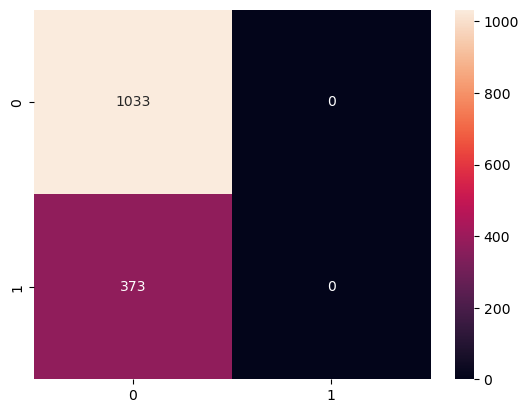

In [34]:
# 여기에 답안코드를 작성하세요.
from sklearn.metrics import confusion_matrix, classification_report
y_pred = lgbm.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)

sns.heatmap(cm, annot=True, fmt='d')

print(classification_report(y_valid, y_pred)) # zero_division=1 넣으면 경고 안 뜸

##### **<span style="color:red">다음 문항을 풀기 전에</span> 아래 코드를 실행하세요.**

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

tf.random.set_seed(1)

### 15. 고객 이탈여부를 예측하는 딥러닝 모델을 만들려고 합니다.
### 아래 가이드에 따라 모델링하고 학습을 진행하세요.
* Tensoflow framework를 사용하여 딥러닝 모델을 만드세요.
* 히든레이어(hidden layer) 2개이상으로 모델을 구성하세요.
* dropout 비율 0.2로 Dropout 레이어 1개를 추가해 주세요.
* 하이퍼파라미터 epochs: 30, batch_size: 16으로 설정해주세요.
* 각 에포크마다 loss와 metrics 평가하기 위한 데이터로 X_valid, y_valid 사용하세요.
* 학습정보는 history 변수에 저장해주세요

In [ ]:
# 여기에 답안코드를 작성하세요.
nfeatures = X_train.shape[1]

# Sequential 모델 만들기
model = Sequential([
    Dense(64, input_shape = (nfeatures, ), activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dropout(0.2),
    Dense(16, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['acc'])

# 학습
history = model.fit(X_train, y_train, epochs = 30, batch_size = 16, validation_data = (X_valid, y_valid), verbose = 1).history

<br>

### 16. 위 딥러닝 모델의 성능을 평가하려고 합니다.
### Matplotlib 라이브러리 활용해서 학습 accuracy와 검증 accuracy를 그래프로 표시하세요.
* 1개의 그래프에 학습 accuracy와 검증 accuracy 2가지를 모두 표시하세요.
* 위 2가지 각각의 범례를 'acc', 'val_acc'로 표시하세요.
* 그래프의 타이틀은 'Accuracy'로 표시하세요.
* X축에는 'Epochs'라고 표시하고 Y축에는 'Acc'라고 표시하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
plt.figure(figsize=(10,6))
plt.plot(history['acc'], label='acc')
plt.plot(history['val_acc'], label='val_acc')

plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()